In [1]:
import numpy as np 

from oracle import simulator_moslb
from moslb import moslb

In [2]:
m = 3 # number of objectives
d = 5 # number of context's dimension
K = 5 * d # number of arms at each round

In [3]:
env = simulator_moslb(num_obj=m,num_dim=d,num_arm=K,vary_context=0)
env.reset()

In [4]:
alg = moslb(num_dim=d, num_obj=m)
alg.reset()

In [5]:
T = 1000
R = 0 
R_his = [0]

for t in range(T): 
    X = env.observe_context(verbose=1)
    a_t = alg.take_action(X, alpha=.1)

    r_t = env.get_reward(a_t)
    reg_t = env.regret(a_t)
    alg.update_params(arm_context=X[a_t], reward=r_t)

    R += reg_t
    R_his.append(R)
    if (t+1)%100 == 0: print('Round: {:d}, regret: {:.4f}'.format(t, R))

{'#arms': 25,
 '#dimension': 5,
 '#objective': 3,
 '#optimal arms': 8,
 'Regret for each arm': array([[0.0183518 ],
       [0.        ],
       [0.30599897],
       [0.30822368],
       [0.        ],
       [0.        ],
       [0.15034161],
       [0.24484336],
       [0.44041407],
       [0.08867548],
       [0.        ],
       [0.        ],
       [0.07888076],
       [0.02915595],
       [0.01112341],
       [0.11823009],
       [0.32621685],
       [0.08795753],
       [0.        ],
       [0.32909967],
       [0.16186672],
       [0.14721088],
       [0.36525536],
       [0.        ],
       [0.        ]])}
Round: 99, regret: 5.6094
Round: 199, regret: 9.4394
Round: 299, regret: 12.1102
Round: 399, regret: 13.9608
Round: 499, regret: 18.1053
Round: 599, regret: 19.1664
Round: 699, regret: 20.2034
Round: 799, regret: 20.6104
Round: 899, regret: 20.9952
Round: 999, regret: 21.5035


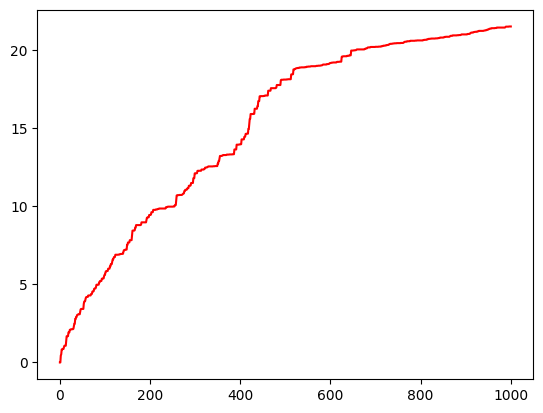

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(T+1), R_his, color='r', linestyle='-', label="P-UCB")

## Example for MOSLB-PL
Running with five objectives under MPL-PL order $\{\{0,1,2\},\{3,4\}\}$.

In [7]:
from oracle import simulator_moslb_pl
from moslb import moslb_pl

In [8]:
pl = [[0,1,2],[3,4]]

In [9]:
env = simulator_moslb_pl(num_dim=d,priority_level=pl,num_arm=K,vary_context=1)

In [10]:
alg = moslb_pl(num_dim=d, priority_level=pl)

In [11]:
T = 3000
R = np.zeros((len(pl),))
epsilon = 5 * d**(2/3) * (T)**(-1/3)

env.reset()
alg.reset()

for t in range(T): 
    X = env.observe_context(verbose=0)
    a_t = alg.take_action(X, epsilon=epsilon, alpha=.1)

    r_t = env.get_reward(a_t)
    reg_t = env.regret(a_t)
    alg.update_params(arm_context=X[a_t], reward=r_t)

    R += reg_t
    if (t+1)%100 == 0: print('Round: {:d}, regret: {}'.format(t, R))

Round: 99, regret: [22.37970424  1.23266528]
Round: 199, regret: [43.57381106  1.8220185 ]
Round: 299, regret: [62.75200995  3.69322103]
Round: 399, regret: [84.01551784  6.22380511]
Round: 499, regret: [85.47162247  7.62481822]
Round: 599, regret: [88.54014222  8.46280279]
Round: 699, regret: [90.45024796  9.92304402]
Round: 799, regret: [91.56993213 10.61303482]
Round: 899, regret: [92.7733859  10.75199959]
Round: 999, regret: [93.06084207 11.490219  ]
Round: 1099, regret: [93.53601021 11.70849262]
Round: 1199, regret: [94.05877794 12.3760413 ]
Round: 1299, regret: [95.00981207 12.60179228]
Round: 1399, regret: [95.51924348 12.75676528]
Round: 1499, regret: [96.35224197 12.85847688]
Round: 1599, regret: [97.49563428 13.21907127]
Round: 1699, regret: [98.52783469 13.50342237]
Round: 1799, regret: [99.16110925 14.02115873]
Round: 1899, regret: [100.40764639  14.06730534]
Round: 1999, regret: [101.40782623  14.39907542]
Round: 2099, regret: [102.06163093  15.05465449]
Round: 2199, regre

## Example for MOSLB-PC
Running with five objectives under MPL-PC relation $\{\{0,1\},\{2,3,4\}\}$.

In [12]:
from oracle import simulator_moslb_pc
from moslb import moslb_pc

In [13]:
pc = [[0,1],[2,3,4]]

In [14]:
env = simulator_moslb_pc(num_dim=d,priority_chain=pc,num_arm=K,vary_context=0)
env.reset()

In [15]:
alg = moslb_pc(num_dim=d, priority_chain=pc)

In [16]:
T = 3000
R = np.zeros((env.c_max,))
epsilon = 5 * d**(2/3) * (T)**(-1/3)

env.reset()
alg.reset()

for t in range(T): 
    X = env.observe_context(verbose=0)
    a_t = alg.take_action(X, epsilon=epsilon, alpha=.1)

    r_t = env.get_reward(a_t)
    reg_t = env.regret(a_t)
    alg.update_params(arm_context=X[a_t], reward=r_t)

    R += reg_t
    if (t+1)%100 == 0: print('Round: {:d}, regret: {}'.format(t, R))

Round: 99, regret: [16.   29.43  1.05]
Round: 199, regret: [33.29 53.06  2.82]
Round: 299, regret: [52.4  80.85  5.06]
Round: 399, regret: [ 68.19 106.49   5.06]
Round: 499, regret: [ 85.08 127.05   6.04]
Round: 599, regret: [101.52 151.     7.28]
Round: 699, regret: [117.01 176.81   8.  ]
Round: 799, regret: [124.27 186.58   8.92]
Round: 899, regret: [131.01 195.36   9.91]
Round: 999, regret: [131.01 195.36   9.91]
Round: 1099, regret: [131.01 195.36   9.91]
Round: 1199, regret: [135.23 203.96  10.24]
Round: 1299, regret: [137.05 207.2   10.24]
Round: 1399, regret: [137.05 207.2   10.24]
Round: 1499, regret: [137.05 207.2   10.24]
Round: 1599, regret: [137.05 207.2   10.24]
Round: 1699, regret: [137.05 207.2   10.24]
Round: 1799, regret: [137.05 207.2   10.24]
Round: 1899, regret: [137.05 207.2   10.24]
Round: 1999, regret: [137.05 207.2   10.24]
Round: 2099, regret: [137.05 207.2   10.24]
Round: 2199, regret: [137.05 207.2   10.24]
Round: 2299, regret: [137.05 207.2   10.24]
Round: 2